In [33]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [34]:
print(tf.__version__)

2.0.0


In [35]:
# actual weight = 2 and actual bias = 0.9
x = np.linspace(0, 3, 120)
y = 2 * x + 0.9 + np.random.randn(*x.shape) * 0.3

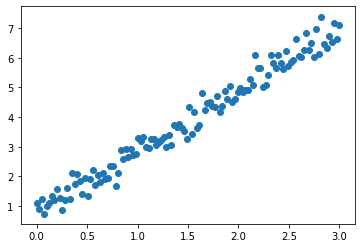

In [43]:
plt.scatter(x,y, label="input data set")

In [37]:
class LinearModel:
    def __call__(self, x):
        return self.Weight * x + self.Bias
    
    def __init__(self):
        self.Weight = tf.Variable(11.0)
        self.Bias = tf.Variable(12.0)

    

In [49]:
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

def train(linear_model, x, y, lr=0.12):
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x))

    lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
    linear_model.Weight.assign_sub(lr * lr_weight)
    linear_model.Bias.assign_sub(lr * lr_bias)

In [90]:
linear_model = LinearModel()
Weights, Biases = [], []
epochs = 80
for epoch_count in range(epochs):
    Weights.append(linear_model.Weight.numpy()) 
    Biases.append(linear_model.Bias.numpy())
    real_loss = loss(y, linear_model(x))
    train(linear_model, x, y, lr=0.12)
    print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

Epoch count 0: Loss value: 667.0184936523438
Epoch count 1: Loss value: 10.704632759094238
Epoch count 2: Loss value: 5.42146110534668
Epoch count 3: Loss value: 4.890740871429443
Epoch count 4: Loss value: 4.440497875213623
Epoch count 5: Loss value: 4.032667636871338
Epoch count 6: Loss value: 3.663055896759033
Epoch count 7: Loss value: 3.3280789852142334
Epoch count 8: Loss value: 3.024491548538208
Epoch count 9: Loss value: 2.749352216720581
Epoch count 10: Loss value: 2.499995231628418
Epoch count 11: Loss value: 2.2740046977996826
Epoch count 12: Loss value: 2.069190740585327
Epoch count 13: Loss value: 1.883569359779358
Epoch count 14: Loss value: 1.7153419256210327
Epoch count 15: Loss value: 1.5628784894943237
Epoch count 16: Loss value: 1.4247019290924072
Epoch count 17: Loss value: 1.299473524093628
Epoch count 18: Loss value: 1.185979962348938
Epoch count 19: Loss value: 1.0831211805343628
Epoch count 20: Loss value: 0.9899011850357056
Epoch count 21: Loss value: 0.9054163

In [91]:
linear_model.Weight.numpy(), linear_model.Bias.numpy()

(2.0066829, 0.8932019)

In [92]:
RMSE = loss(y, linear_model(x))

In [93]:
RMSE.numpy()

0.09077441